 # Sử dụng thư viện vietnam-stock-analysis

In [1]:
import sys

sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.graph_objs as go

from vietnam_stock_analysis.stock_reader import ticker_data_reader, TickerGroup
from vietnam_stock_analysis.stock_analyzer import StockAnalyzer, AssetGroupAnalyzer
from vietnam_stock_analysis.technical_indicators import MA, EMA, MACD, Candlestick


 ## 1. Đọc data

 ### 1.1 Đọc data đơn

In [2]:
vnm = ticker_data_reader("vnm", days_from_now=120)


In [3]:
vnm.head()


,Open,High,Low,Close,Volume,Currency,name
Date,,,,,,,
2020-05-25,114500.0,117600.0,114100.0,117600.0,1581860,VND,VNM
2020-05-26,118000.0,118000.0,115200.0,117600.0,983170,VND,VNM
2020-05-27,117700.0,117800.0,115000.0,115000.0,1108350,VND,VNM
2020-05-28,115000.0,116000.0,114800.0,114800.0,1004500,VND,VNM
2020-05-29,113500.0,115200.0,113500.0,115000.0,1203680,VND,VNM


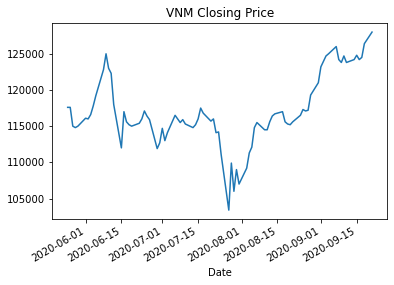

In [4]:
vnm["Close"].plot()
plt.title("VNM Closing Price")
plt.show()


 ### 1.2 Đọc data theo nhóm

In [5]:
group = TickerGroup(["vnm", "ctg", "aaa"])


In [6]:
group


['VNM', 'CTG', 'AAA'] - (24/08/2020 - 21/09/2020)

In [7]:
group.summary_info


name                   AAA           CTG           VNM
Close  count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   1.245250e+04  2.537500e+04  1.228000e+05
       std    1.650159e+02  4.945758e+02  3.460757e+03
       min    1.220000e+04  2.440000e+04  1.165000e+05
       25%    1.230000e+04  2.507500e+04  1.205750e+05
       50%    1.250000e+04  2.535000e+04  1.242000e+05
       75%    1.256250e+04  2.572500e+04  1.247250e+05
       max    1.270000e+04  2.615000e+04  1.281000e+05
High   count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   1.258500e+04  2.569750e+04  1.235350e+05
       std    1.755443e+02  5.030107e+02  3.515421e+03
       min    1.230000e+04  2.480000e+04  1.176000e+05
       25%    1.240000e+04  2.543750e+04  1.207500e+05
       50%    1.257500e+04  2.567500e+04  1.248500e+05
       75%    1.271250e+04  2.615000e+04  1.255000e+05
       max    1.285000e+04  2.660000e+04  1.284000e+05
Low    count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   1.234750e+04  2.513750e+04  1.217450e+05
       std    1.681752e+02  4.489388e+02  3.315272e+03
       min    1.210000e+04  2.440000e+04  1.160000e+05
       25%    1.220000e+04  2.480000e+04  1.189250e+05
       50%    1.227500e+04  2.517500e+04  1.235000e+05
       75%    1.250000e+04  2.543750e+04  1.240000e+05
       max    1.260000e+04  2.585000e+04  1.264000e+05
Open   count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   1.244250e+04  2.537250e+04  1.223300e+05
       std    1.830121e+02  5.347097e+02  3.283948e+03
       min    1.220000e+04  2.450000e+04  1.165000e+05
       25%    1.228750e+04  2.505000e+04  1.197250e+05
       50%    1.240000e+04  2.542500e+04  1.238500e+05
       75%    1.260000e+04  2.570000e+04  1.247000e+05
       max    1.275000e+04  2.635000e+04  1.265000e+05
Volume count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   2.680713e+06  4.992881e+06  1.376265e+06
       std    1.154993e+06  2.127879e+06  4.589142e+05
       min    1.219780e+06  1.923530e+06  6.148000e+05
       25%    1.797725e+06  3.420628e+06  9.380100e+05
       50%    2.631705e+06  4.310435e+06  1.412315e+06
       75%    3.186695e+06  6.633012e+06  1.697768e+06
       max    5.889520e+06  9.589990e+06  2.178380e+06

In [8]:
group.portfolio.tail()


,Close,High,Low,Open,Volume
Date,,,,,
2020-09-15,162450.0,163050.0,161650.0,162200.0,5959490
2020-09-16,161600.0,162750.0,161150.0,162700.0,7288580
2020-09-17,162100.0,164000.0,161400.0,161500.0,8298200
2020-09-18,164450.0,164600.0,161850.0,162400.0,6782440
2020-09-21,166400.0,166750.0,164400.0,164700.0,3758110


In [9]:
group_data = group.raw_data
group_data.sample(n=5)


,Close,Currency,High,Low,Open,Volume,name
Date,,,,,,,
2020-09-14,25600.0,VND,26000.0,25550.0,26000.0,2823060,CTG
2020-09-03,25950.0,VND,26600.0,25850.0,26350.0,8343610,CTG
2020-08-25,117300.0,VND,117900.0,116800.0,117000.0,1693030,VNM
2020-09-15,12250.0,VND,12400.0,12250.0,12350.0,1812360,AAA
2020-08-24,24400.0,VND,24800.0,24400.0,24700.0,4407840,CTG


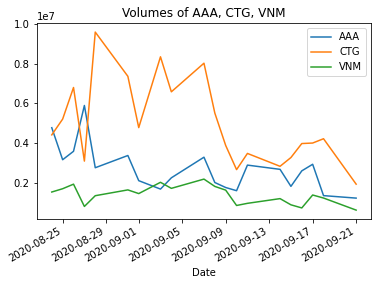

In [10]:
group_data.groupby("name")["Volume"].plot()
plt.legend()
plt.title("Volumes of AAA, CTG, VNM")
plt.show()


 ## 2. Các chỉ số

 ### 2.1 Phân tích theo mã

In [11]:
vnm_analyzer = StockAnalyzer(vnm)


In [12]:
vnm_analyzer.resistance()


128666.66666666666

In [13]:
vnm_analyzer.support(level=2)


125733.33333333333

 ### 2.2 Phân tích theo nhóm

In [14]:
group_analyzer = AssetGroupAnalyzer(group_data)


In [15]:
group_cummulative_returns = group_analyzer.analyze("cummulative_returns")
group_cummulative_returns


{'AAA': Date
 2020-08-24         NaN
 2020-08-25    0.987903
 2020-08-26    0.991935
 2020-08-27    1.024194
 2020-08-28    1.012097
 2020-08-31    1.012097
 2020-09-01    1.008065
 2020-09-03    1.008065
 2020-09-04    1.012097
 2020-09-07    1.016129
 2020-09-08    1.020161
 2020-09-09    1.024194
 2020-09-10    1.016129
 2020-09-11    1.012097
 2020-09-14    0.995968
 2020-09-15    0.987903
 2020-09-16    0.983871
 2020-09-17    0.991935
 2020-09-18    0.987903
 2020-09-21    0.991935
 Name: Close, dtype: float64,
 'CTG': Date
 2020-08-24         NaN
 2020-08-25    1.012295
 2020-08-26    1.012295
 2020-08-27    1.014344
 2020-08-28    1.028689
 2020-08-31    1.053279
 2020-09-01    1.071721
 2020-09-03    1.063525
 2020-09-04    1.065574
 2020-09-07    1.024590
 2020-09-08    1.047131
 2020-09-09    1.036885
 2020-09-10    1.036885
 2020-09-11    1.049180
 2020-09-14    1.049180
 2020-09-15    1.040984
 2020-09-16    1.032787
 2020-09-17    1.036885
 2020-09-18    1.057377
 2020-09

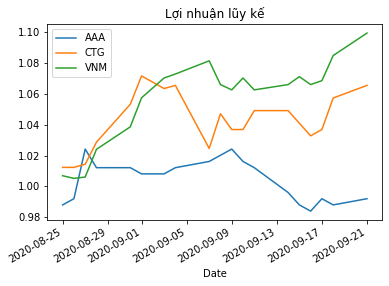

In [16]:
for name, data in group_cummulative_returns.items():
    data.plot(label=name, legend=True)

plt.title("Lợi nhuận lũy kế")
plt.show()


 ## 3. Chỉ số kĩ thuật

 ### 3.1 Dạng số

In [17]:
EMA(vnm).result


Date
2020-05-25              NaN
2020-05-26              NaN
2020-05-27              NaN
2020-05-28              NaN
2020-05-29              NaN
                  ...      
2020-09-15    121226.628688
2020-09-16    121496.935171
2020-09-17    121769.941065
2020-09-18    122190.855513
2020-09-21    122718.959558
Name: Close, Length: 85, dtype: float64

In [18]:
MACD(vnm).result - MACD(vnm, exp=9).result


Date
2020-05-25           NaN
2020-05-26           NaN
2020-05-27           NaN
2020-05-28           NaN
2020-05-29           NaN
                 ...    
2020-09-15    116.423533
2020-09-16      9.730816
2020-09-17    -61.487496
2020-09-18    -12.082264
2020-09-21     92.074779
Name: Close, Length: 85, dtype: float64

 ### 3.2 Dạng đồ thị

In [19]:
go.Figure(
    data=[
        MA(vnm).plot(line=dict(color="#BEBECF")),
        EMA(vnm).plot(line=dict(color="#17BECF")),
        Candlestick(vnm).plot(),
    ],
    layout=go.Layout(template="plotly_dark"),
)


In [20]:
fig = make_subplots(3, 1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.5, 0.2, 0.3])
fig.append_trace(Candlestick(vnm).plot(), 1, 1)
fig.append_trace(go.Bar(x=vnm.index, y=vnm["Volume"], name="Volume"), 2, 1)
fig.append_trace(MACD(vnm).plot(), 3, 1)
fig.append_trace(MACD(vnm, exp=9).plot(), 3, 1)

fig.update_layout(
    template="plotly_dark",
)
fig.update_layout(xaxis=dict(rangeslider=dict(visible=False)))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()
